## 1. Project Title: Machine Learning for Jewelry Price Optimization

This project aims to successfully predict the prices of jewelry pieces. This will allow the jewelry company to reduce its dependence on gemologists and expensive jewelry appraisal experts. 

## 2. Methodology

This project will be carried out using the CRISP-DM (Cross Industry Standard Process for Data Mining) methodology. This is one of the more popular data science methodologies and is characterized by six important phases, which are as follows:

1. Business Understanding,
2. Data Understanding,
3. Data Preparation,
4. Data Modellling,
5. Model Evaluation and
6. Model Deployment

It should be noted that thease phases are usually recurrent in nature (i.e. some phases may be repeated). As such, they do not necessarily follow a linear progression.

## 3. Tools

The tools of use for this project include:
1. Pandas
2. Numpy
3. Matplotlib & Seaborn
4. Sci-kit Learn

3.1 Pamdas & Numpy
Pandas is a Python library built upon the Numpy library. The idea behind Pandas is to be able to operate on text data, where Numpy is best suited for numerical operations, irrespective of the fact that it can represent text to some degree.

3.2 Matplotlib & Seaborn
Matplotlib & Seaborn are Python libraries for data visualization. Other alternatives include Bokeh and Plotly.

3.3 Sci-kit Learn
Sci-kit Learn is a Python library which is used extensively for machine learning. It has a simple API centered arund two maintypes of objects:

* Transformers and
* Estimators

Transformers are used to transform data fron one form to another, while estimators arte used to learn from data and generate some kind of prediction. Sci-kit Learn is perhaps the most popular ML library due to facts:

* that has a very simple API,
* it is relatively easy to get started with, and
* it has a wide variety of use cases.


## Project Implementation vis CRISP-DM

#### 01. Business Understanding

##### Gemineye Emporium is an expanding jewelry dealer. The firm has recently begun a new wave of expansion across the country. While this should be good for business. it also comes with increased costs and the need for increased operational efficiency.

One such area is the need to accurately price their jewelry products. At present, their jewelry items are being priced by gemologists and appraisal experts. However, this process can be quite a lengthy one, not to mention expensive, as most gemologists are well-sought and expensive to call upon. Gemineye would love to explore the use of machine learning for predicting the optimal prices at whihc their jewelry should be sold. Utilizing ML for this task would allow the company:

* improve the speed and scalability of their pricing, and
* cut down on the costs of hiring gem experts.

#### 02. Data Understanding

With the Business Understaing out of the way, the next step is to understand the data to be obtained and used for the task. This will involve the process of Exploratory Data Analysis (EDA).

#### EDA is the process of sifting through data with the goal of extracting insights. These insights allow a better understanding of the available data and what can be done with it. 
#### They can also be used for guided preparation of the dataset in the appropriate manner. Just like regiular analysis, EDA begins with a set of questions and /or hypotheses. The EDA process will then prove or disprove these hypotheses, and hopefully, reveal other points of inquiry along the way.

#### The required libraries and packah=ges are imported first. The EDA process is carried out here as shown below. The high-level steps to follow are:

* 1. Import the required libraries
  2. Load in the dataset
  3. Analyze and observe its properties.
     * Missing data
     * Outliers
     * Inconsistent values
     * Low categorical cardinality
     * Data imbalance
     * Feature correlations
* 4. Report on these properties and how they might affect our final solution.
     
       

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Set visualization theme
sns.set()

In [2]:
# Import the dataset
data = pd.read_csv(r"C:\Users\gideonokomayin\OneDrive - FLOUR MILLS OF NIGERIA PLC\Desktop\AMDARI INTERNSHIP\JEWELRY PRICE OPTIMIZATION\Jewelry_Dataset.csv")

data.columns = [
    "Order_Datetime",
    "Order_ID",
    "Product_Id",
    "SKU_Quantity",
    "Category_ID",
    "Category",
    "Brand_ID",
    "Price_USD",
    "User_ID",
    "Target_Gender",
    "Main_Color",
    "Main_Metal",
    "Main_Gem",
    
]
    

In [3]:
# Peek at the data
data.head()

,Order_Datetime,Order_ID,Product_Id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,jewelry.pendant,0.0,88.90,1.515916e+18,f,red,gold,diamond
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,jewelry.necklace,0.0,417.67,1.515916e+18,NaN,red,gold,amethyst
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,jewelry.earring,1.0,102.27,1.515916e+18,NaN,red,gold,NaN


In [4]:
# Check for missing values
data.isnull().sum()

Order_Datetime        0
Order_ID              0
Product_Id            0
SKU_Quantity          0
Category_ID        5352
Category           9933
Brand_ID           4785
Price_USD          5352
User_ID            5352
Target_Gender     48167
Main_Color         7660
Main_Metal         5462
Main_Gem          34058
dtype: int64

Observation: The above showed there were alot of missing values. 

In [5]:
#Data shape
data.shape

(95910, 13)

Observation: 50% of data in "Target_Gender" and about 36% of data in "Main_Gem" columns were missing.

In [6]:
# Feature cardinality (i.e to identify the number of unique values that a column or feature can take)
data.nunique()

Order_Datetime    74504
Order_ID          74759
Product_Id         9613
SKU_Quantity          1
Category_ID          25
Category            218
Brand_ID           2537
Price_USD          3166
User_ID           31079
Target_Gender         2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

Observation:
Only 1 unique value was available for SKU_Quantity, which may not be of much use. Also based on the values, we may deduce that the following are categorical values in nature: Target_Gender, Main_Color, Main_Metal and Main_Gem. 
User_ID will be treated as categorical since it is an identifier and cannot be measured in a continuous form, eventhough it has a large cardinality.
Price_USD is a numerical value as shown on the dataset.

In [7]:
# Data description
data.describe()

,Order_ID,Product_Id,SKU_Quantity,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


Observation: Based on the statirtical analysis above, Price_USD seemed to the most important feature we might be working with 

In [8]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_Id      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


Observation: From the above information, we may have to encode the catogical features identified like Target_Gender, Main_Color, Main_Metal, Main_Gem and Category, since they were represented in text.

In [9]:
# Duplicate values
num_duplicated = len(data.loc[data.duplicated()])

In [10]:
print(f"Number of duplicate records:", num_duplicated)

Number of duplicate records: 2589


In [11]:
# Features with a cardinality of 1 (invariant features)
invariant_features = data.nunique()[data.nunique() == 1].index.tolist()

In [12]:
invariant_features

['SKU_Quantity']

In [13]:
# Check for label distribution
data["Price_USD"].skew()

18.95906072625981

Observation: The skew is quite high and positive. This means our Price data is likely going to be strongly right skewed. 

In [14]:
# Price Kurtosis
data["Price_USD"].kurtosis()

1054.8979068506155

This indicate a very kurtosis

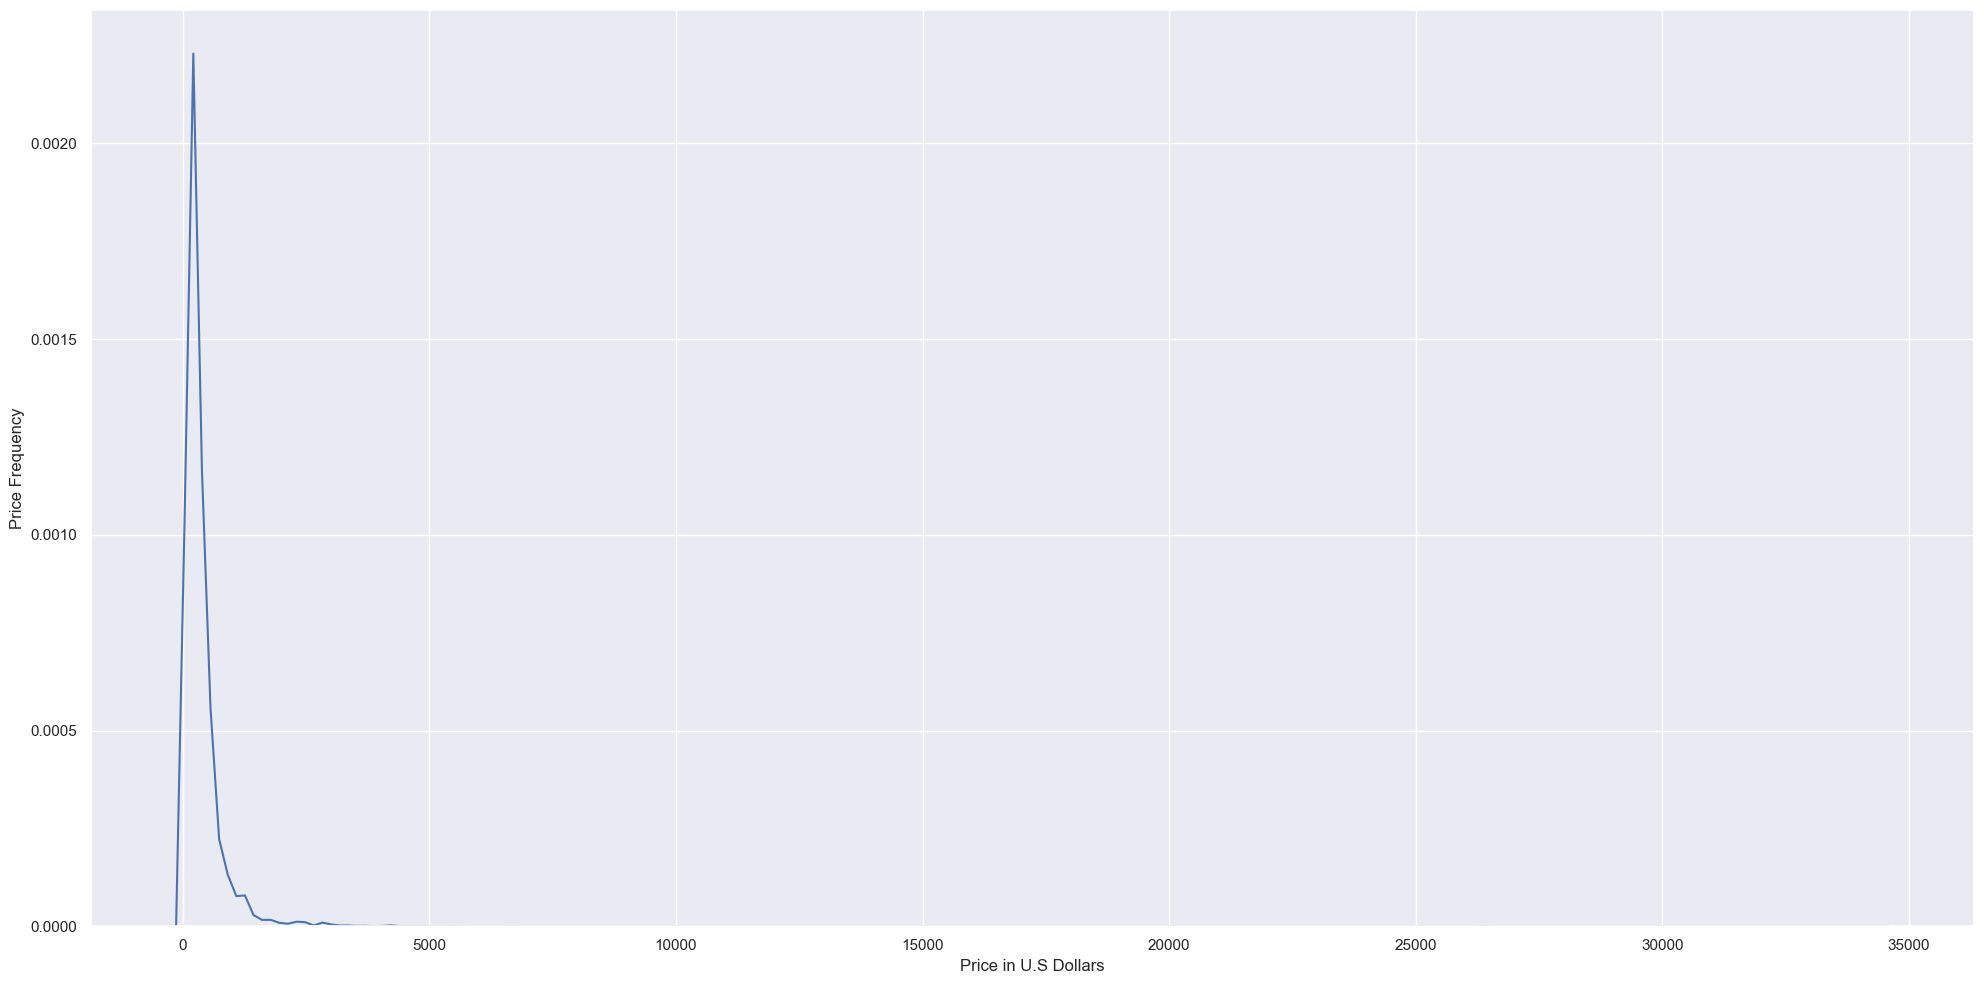

In [15]:
# Visualize the price distribution.
plt.figure(figsize = (20, 10))

sns.kdeplot(data = data, x ="Price_USD")

plt.xlabel("Price in U.S Dollars")
plt.ylabel("Price Frequency")

plt.tight_layout()
plt.show(); plt.close()

Observation: From the above Visuals, this shows that the prices at the peak are relatively very rear.

In [16]:
# Target gender analysis
data["Target_Gender"].value_counts()

Target_Gender
f    47379
m      364
Name: count, dtype: int64

In [17]:
data["Target_Gender"].value_counts(normalize = True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

Observation: The female gender significantly out performed the male

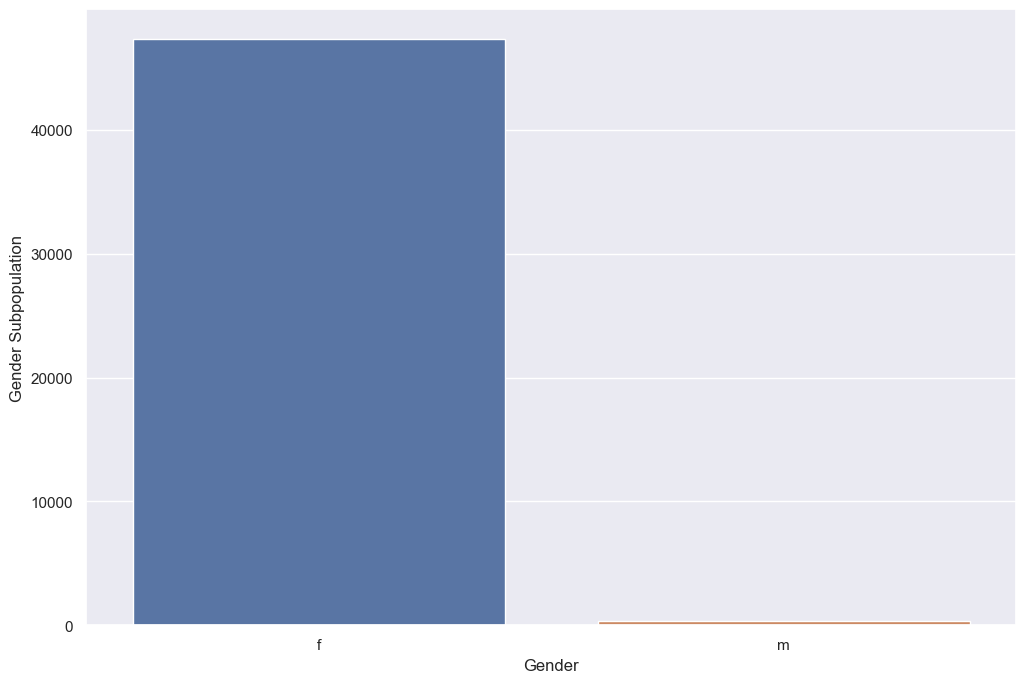

In [18]:
# Visualize target gender
plt.figure(figsize = (12, 8))

sns.countplot(data = data, x = "Target_Gender")

plt.xlabel("Gender")
plt.ylabel("Gender Subpopulation")

plt.show(); plt.close()

Observation: This is incredibly skewed and in favour of the female. As a business concern, a male tailored jewelry might be advised to be taken into account.  

In [19]:
# Jewelry Category analysis
data["Category"].value_counts()

Category
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64

Observation: Not all values presented made sense. The top values are useful since they were categorized rightly, while the ones beneath do not. It showed corruption in the data.

In [20]:
data["Category"].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

Observation: Aside, the missing value and other categorized features, the rest of the numerical information made no sense. So the best thing to do is to eliminate them. Also, it was discovered that while we were dealing with jewelry we had 'electronics.clocks' appeared here.

In [21]:
# Extract the autual categories
categories = data["Category"].unique().tolist()
categories = [c for c in categories if isinstance(c, str) and "jewelry" in c]

In [22]:
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [23]:
# Pick out authentic data based on categories
real_categories = data.loc[data["Category"].isin(categories)]

In [24]:
# Checking Percentage of missing values again
100 * data.isnull().sum() / len(data)

Order_Datetime     0.000000
Order_ID           0.000000
Product_Id         0.000000
SKU_Quantity       0.000000
Category_ID        5.580231
Category          10.356584
Brand_ID           4.989052
Price_USD          5.580231
User_ID            5.580231
Target_Gender     50.221041
Main_Color         7.986654
Main_Metal         5.694922
Main_Gem          35.510374
dtype: float64

In [25]:
# Checking Percentage of missing values ifrom the authentic data based on categories
100 * real_categories.isnull().sum() / len(real_categories)

Order_Datetime     0.000000
Order_ID           0.000000
Product_Id         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category           0.000000
Brand_ID           4.309081
Price_USD          0.000000
User_ID            0.000000
Target_Gender     44.842029
Main_Color         2.656044
Main_Metal         0.110617
Main_Gem          24.232519
dtype: float64

Observation: This shows a better situation as there is now a huge reduction in the missing values. For example the Category, Price_USD and User_ID that were missing earlier had been fixed.This means a large chunk of the corruption that was observed was due to having a feature (Category of the jewelry) corrupted. 

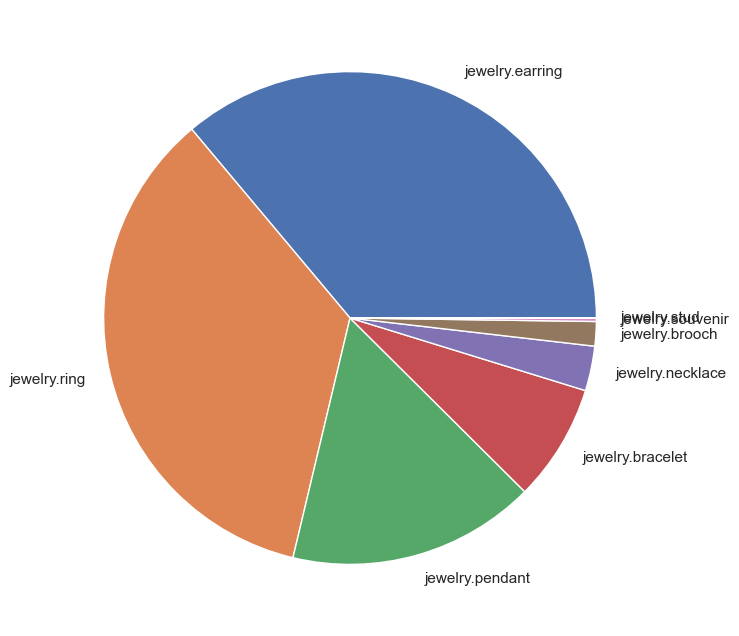

In [26]:
# Visualize Jewelry categories
subdata = real_categories["Category"].value_counts()

jewelry_categories, counts = subdata.index.tolist(), subdata.values.tolist()

plt.figure(figsize = (12, 8))

plt.pie(x = counts, labels = jewelry_categories)

plt.show(); plt.close()

Observation: From the above pie chart, Jewelry.earing and Jewelry.ring seemed to perform the best as they seemed to perform the best.

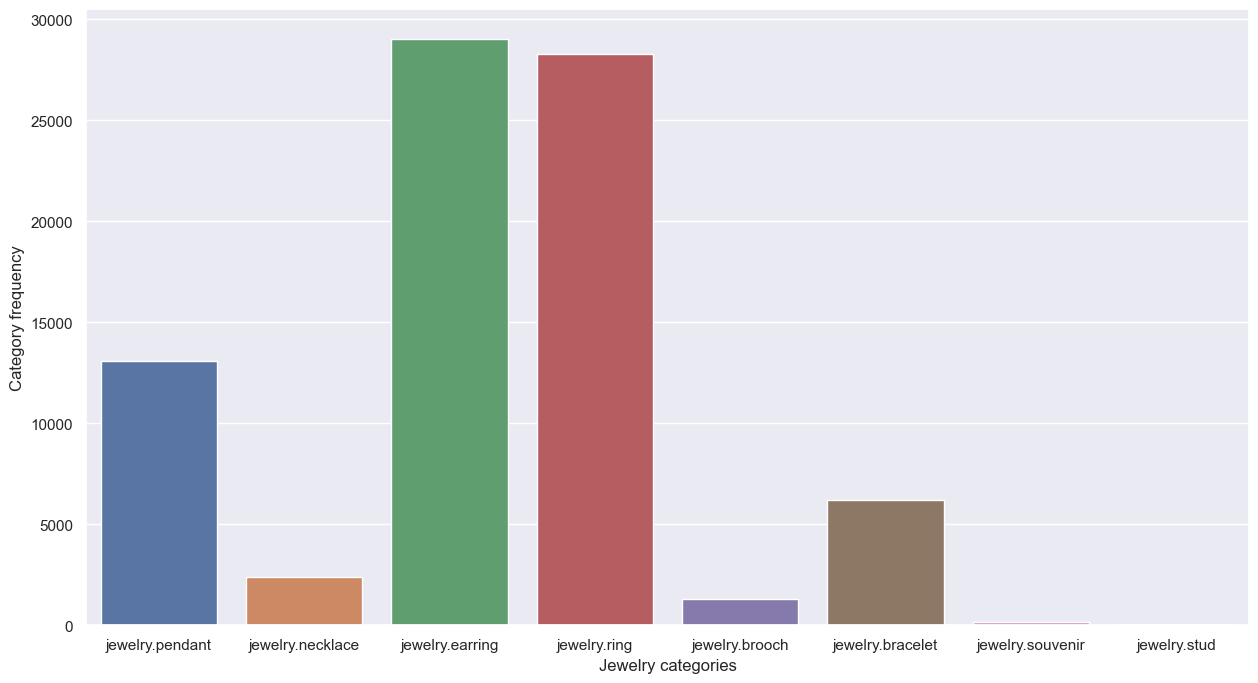

In [27]:
# Category count plot
plt.figure(figsize = (15, 8))

sns.countplot(data = real_categories, x = "Category")

plt.xlabel("Jewelry categories")
plt.ylabel("Category frequency")
plt.show(); plt.close()

Observation: This count plot shows the frequencies of each jewelry categories and we can observe that both jewelry.earing and jewelry.ring accounts for more than 60% of the jewelry categories that people are patronizing. 

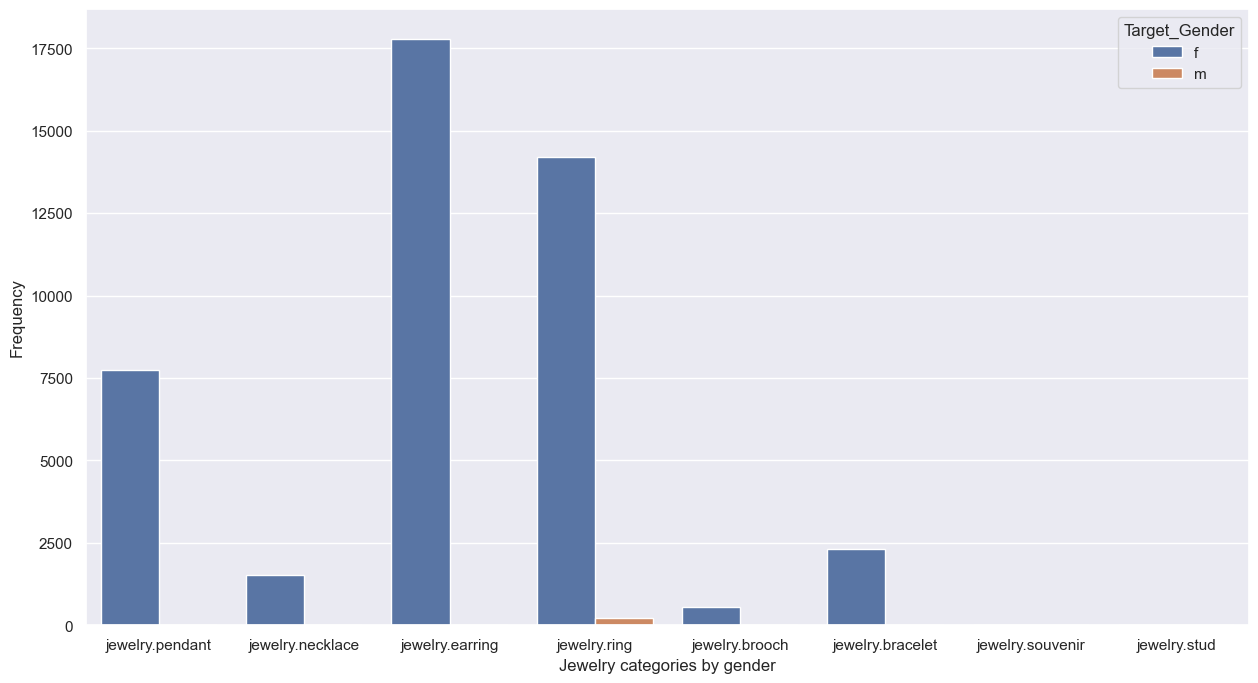

In [28]:
# Jewelry Category by gender
plt.figure(figsize = (15, 8))

sns.countplot(data = real_categories, x = "Category", hue = "Target_Gender")

plt.xlabel("Jewelry categories by gender")
plt.ylabel("Frequency")

plt.show(); plt.close()

Observation: From the above, it showed almost all the jewelry categories were not been patronized by the male gender, except jewelry.ring category. The business owner could be advised at this point on the need to develop an attractive jewelry targeting the male gender and expect good returns.

In [29]:
# Gender skew in original data
data["Target_Gender"].value_counts(normalize = True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

In [30]:
# Gender skew in original data
real_categories["Target_Gender"].value_counts(normalize = True)

Target_Gender
f    0.994434
m    0.005566
Name: proportion, dtype: float64

In [31]:
#Encode Jewelry categories
encoded, category_code = pd.factorize(real_categories["Category"])
real_categories.loc[:, "Category"] = encoded

In [32]:
#Encode gender
encoded, category_code = pd.factorize(real_categories["Target_Gender"])
real_categories.loc[:, "Target_Gender"] = encoded

In [33]:
#Encode gems
encoded, category_code = pd.factorize(real_categories["Main_Gem"])
real_categories.loc[:, "Main_Gem"] = encoded

In [34]:
#Encode color
encoded, category_code = pd.factorize(real_categories["Main_Color"])
real_categories.loc[:, "Main_Color"] = encoded

In [35]:
#Encode gems
encoded, category_code = pd.factorize(real_categories["Main_Metal"])
real_categories.loc[:, "Main_Metal"] = encoded

In [36]:
real_categories.head()

,Order_Datetime,Order_ID,Product_Id,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,-1,1,0,2
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,2,1.0,102.27,1.515916e+18,-1,1,0,-1
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,2,0.0,150.55,1.515916e+18,-1,1,0,1


In [37]:
real_categories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80458 entries, 1 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  80458 non-null  object 
 1   Order_ID        80458 non-null  int64  
 2   Product_Id      80458 non-null  int64  
 3   SKU_Quantity    80458 non-null  int64  
 4   Category_ID     80458 non-null  float64
 5   Category        80458 non-null  object 
 6   Brand_ID        76991 non-null  float64
 7   Price_USD       80458 non-null  float64
 8   User_ID         80458 non-null  float64
 9   Target_Gender   80458 non-null  object 
 10  Main_Color      80458 non-null  object 
 11  Main_Metal      80458 non-null  object 
 12  Main_Gem        80458 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 8.6+ MB


In [38]:
# Feature correlation
correlations = real_categories.drop(labels = ["Order_Datetime", "User_ID", "Order_ID", "Product_Id"], axis = 1).corr(method = "spearman")

In [39]:
correlations

,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,NaN,1.000000,-0.886212,0.111328,-0.296495,0.106286,0.003396,0.157834,0.050483
Category,NaN,-0.886212,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,NaN,0.111328,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_USD,NaN,-0.296495,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Target_Gender,NaN,0.106286,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_Color,NaN,0.003396,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_Metal,NaN,0.157834,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_Gem,NaN,0.050483,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


Observation: SKU_Quantity indicated NAN all throough and showing no correlation with other features. 

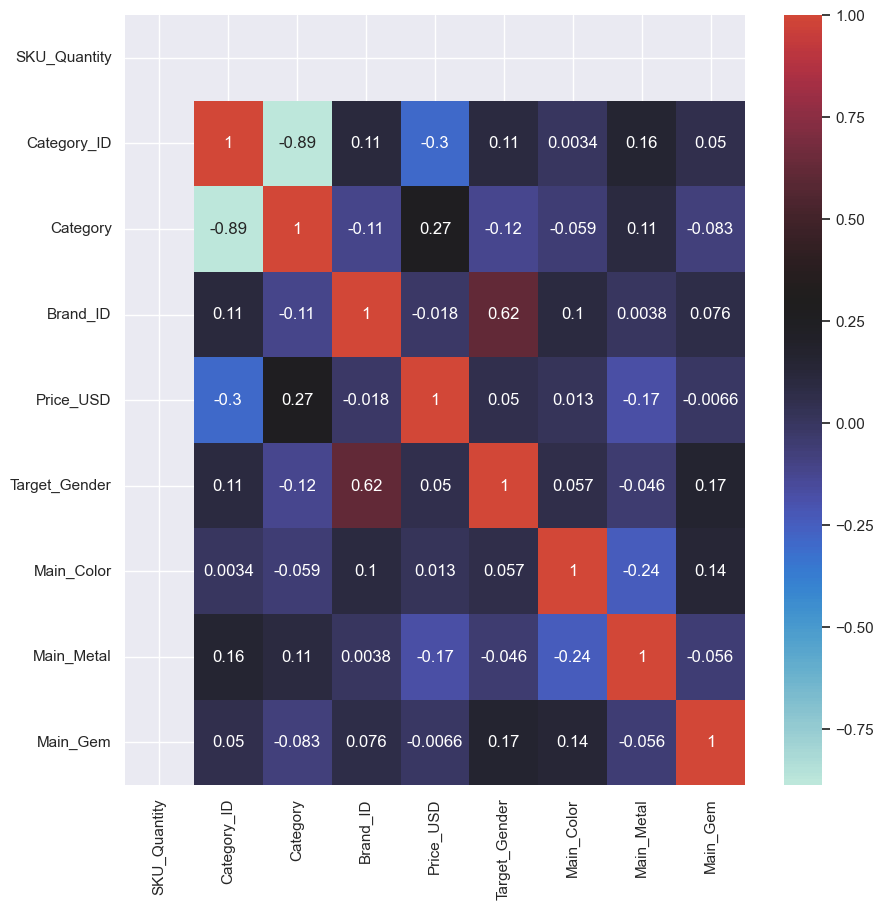

In [40]:
# Correlation heatmap
plt.figure(figsize = (10, 10))

sns.heatmap(correlations, annot = True, center = .3)

plt.show(); plt.close()

Observation: From the Correlation matrix, the SKU_Quantity has no value and do its empty. It can be observed that we have a weak to moderate correlation between our features. However, we go further to analyze and have an explicit idea of those features that were correlated. 

In [41]:
# Set coreelation Limits
upper = 1
lower = 0.2

In [42]:
# Explicitly obtain correlated features
correlated_columns = {
    column: correlations[(correlations[column] > lower) & (upper > correlations[column])].index.tolist()
    for column in correlations.columns
}

In [43]:
correlated_columns

{'SKU_Quantity': [],
 'Category_ID': [],
 'Category': ['Price_USD'],
 'Brand_ID': ['Target_Gender'],
 'Price_USD': ['Category'],
 'Target_Gender': ['Brand_ID'],
 'Main_Color': [],
 'Main_Metal': [],
 'Main_Gem': []}

### Data Implications
Based on our findings, we have drawn the following observations:

1. Missing values: There are alot of missing values in the dataset. This may be fixed either by value imputation or missingness encoding.
2. Data corruption: Some variables, (e.g. jewelry_category) contain corrupt values.
3. Rare values: Some features have some values that occur rarely. A prime instance of this is the Target_Gender column, where the male gender is rarely represented. Sometimes, these are data issues. Other times, like in this case, this can be a true reflection of the distribution from which the data is generated.
4. Low cardinality of feature invariance: The SKU_Quantity feature only has one unique value (e.g. 1). This feature provides no new information.
5. Target skew: The target variable is highly right-skewed. This can present an issue during training.
6. Correlation: For the most part, the features exhibit low multicollinearity, hence ensuring feature independence. However, the target variable exhibits a low correlation with the independence variables.
   



### 03. Data Preparation

Based on the Data implications discovered, the following steps will be experimented upon for the data preparation stage.

1. Missing Values: The missing values will be treated via algorithmic method - SimpleImputer.
2. Feature Encoding: The categorical features will be encoded.
3. Redundant Features: Certain features will be eliminated for a number of reasons. These are:
     A. SKU_Quantity: Feature invariance
     B. Order_ID: Simple identifier has no real-world influence on jewelry price.
     C. Product_ID: Same with Order_ID.
     D. Order_Datetime: Avoid data leakage; would likely not be available in real-world.
   
4. Target Skew: The target variable is strongly right-skewed. This can be an issue when learning a mapping from the data space to the label space. This issue will be fixed using the TransformedTargetRegressor utility.

NOTE: Most of the data preparation steps will be carried out via the use of Pipeline class from Sci-Kit learn. The Pipeline object allows us to chain transformers and estimators sequentially for use as one composite object.

High level steps:
   1. Eliminate less useful features
   2. Extract records with actual categories.
   3. Encode categorical features (if required).
   4. Account for target skew.
   5. Fix missing values.


   

In [44]:
# Columns to eliminate
columns_to_eliminate = [
    "SKU_Quantity",
    "Order_ID",
    "Product_Id",
    "User_ID",
    "Category_ID"
]

In [45]:
# Eliminate unused features
data.drop(labels = columns_to_eliminate, axis = 1, inplace = True)

In [46]:
data.shape

(95910, 8)

In [47]:
# Eliminate unused features
data.drop(labels = ["Order_Datetime"], axis = 1, inplace = True)

In [48]:
data.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


Observation: We now have the right features left behind.

In [49]:
# Eliminate unrealistic categories
data = data.loc[data["Category"].isin(categories), :]

In [50]:
data.shape

(80458, 7)

Observation: About 15,000 rows that were corrupted has been eliminated.

In [51]:
# Split data
from sklearn.model_selection import train_test_split

In [52]:
#Seperate features from labels
X, y = data.drop(labels = ["Price_USD"], axis = 1), data["Price_USD"]

In [53]:
# Create test, train and splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [54]:
X_train.head()

,Category,Brand_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
15417,jewelry.earring,1.0,NaN,red,gold,fianit
69562,jewelry.earring,0.0,NaN,white,gold,diamond
87232,jewelry.pendant,0.0,NaN,red,gold,fianit
55488,jewelry.earring,1.0,NaN,red,gold,fianit
70412,jewelry.earring,1.0,f,red,gold,fianit


In [55]:
y_train.head()

15417      83.42
69562     424.52
87232      77.95
55488     121.78
70412    3258.90
Name: Price_USD, dtype: float64

### 04. Data Modelling

1. Linear Regression,
2. Extremely Random Forest (ExtraTrees),
3. Adaptive Boosting (AdaBoost) and
4. Catboost.

1. Encode categorical features (if required).2. 
Account for target skew.3. 
Fix missing values.

In [56]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor

In [57]:
from sklearn.pipeline import Pipeline

In [58]:
def generate_pipeline(model, column_indices, categorical_indices, fill_missing = True, one_hot = True, label_encode = False):\
   # Fix missing values
    first_transformer = ColumnTransformer(
        transformers = [
            ("imputer", SimpleImputer(strategy = "most_frequent"), column_indices)
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )

    # One hot encode
    second_transformer = ColumnTransformer(
        transformers = [
            ("one_hot", OneHotEncoder(), categorical_indices)
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )

    # Label encode
    third_transformer = ColumnTransformer(
        transformers = [
            ("ordinal", OrdinalEncoder(), categorical_indices)
        ],
        remainder = "passthrough",
        sparse_threshold = 0.
    )

    steps = []

    if fill_missing:
        steps.append(("first", first_transformer))

    if label_encode:
        steps.append(("third", third_transformer))

    if one_hot:
        steps.append(("second", second_transformer))

    steps.append(("model", model))   

    model_pipe = Pipeline(steps = steps)

    return model_pipe

        

In [59]:
X.head()

,Category,Brand_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,jewelry.pendant,1.0,f,white,gold,sapphire
2,jewelry.pendant,0.0,f,red,gold,diamond
3,jewelry.necklace,0.0,NaN,red,gold,amethyst
4,jewelry.earring,1.0,NaN,red,gold,NaN
5,jewelry.earring,0.0,NaN,red,gold,diamond


In [60]:
# Geneqrate Indices
columns = X.columns.tolist()

column_indices = [columns.index(c) for c in columns]
categorical_features = [c for c in columns if c not in ["Brand_ID"]]
categorical_indices = [columns.index(c) for c in categorical_features]

In [61]:
categorical_indices

[0, 2, 3, 4, 5]

In [62]:
# CatBoost pipeline
cat_pipe = generate_pipeline(
    CatBoostRegressor(loss_function = "RMSE", iterations = 10000, learning_rate = 0.1, one_hot_max_size = 2),
    column_indices,
    categorical_indices,
    fill_missing = False, one_hot = False, label_encode = True
)

In [63]:
# LR pipeline
lin_pipe = generate_pipeline(
    LinearRegression(),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [64]:
# AdaBoost pipeline
ada_pipe = generate_pipeline(
    AdaBoostRegressor(loss = "exponential", n_estimators = 1000, learning_rate = 0.1),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [65]:
# ExtraTrees pipeline
extra_pipe = generate_pipeline(
    ExtraTreesRegressor(criterion = "friedman_mse", n_estimators = 1000, bootstrap = True),
    column_indices,
    categorical_indices,
    fill_missing = True, one_hot = True, label_encode = False
)

In [66]:
from sklearn.preprocessing import PowerTransformer

In [67]:
# Transform targets
cat_pipe = TransformedTargetRegressor(regressor = cat_pipe, transformer = PowerTransformer(method = "box-cox"))
ada_pipe = TransformedTargetRegressor(regressor = ada_pipe, transformer = PowerTransformer(method = "box-cox"))
lin_pipe = TransformedTargetRegressor(regressor = lin_pipe, transformer = PowerTransformer(method = "box-cox"))
extra_pipe = TransformedTargetRegressor(regressor = extra_pipe, transformer = PowerTransformer(method = "box-cox"))

In [68]:
print(X_train.isnull().sum())

Category             0
Brand_ID          3137
Target_Gender    32456
Main_Color        1898
Main_Metal          82
Main_Gem         17543
dtype: int64


In [69]:
y_train.head()

15417      83.42
69562     424.52
87232      77.95
55488     121.78
70412    3258.90
Name: Price_USD, dtype: float64

In [70]:
# Fit CatBoost
cat_pipe.fit(X_train, y_train)

0:	learn: 0.9631144	total: 168ms	remaining: 27m 59s
1:	learn: 0.9251512	total: 178ms	remaining: 14m 51s
2:	learn: 0.8982256	total: 188ms	remaining: 10m 26s
3:	learn: 0.8710542	total: 198ms	remaining: 8m 13s
4:	learn: 0.8511862	total: 205ms	remaining: 6m 49s
5:	learn: 0.8300889	total: 212ms	remaining: 5m 53s
6:	learn: 0.8152923	total: 219ms	remaining: 5m 12s
7:	learn: 0.8002549	total: 226ms	remaining: 4m 41s
8:	learn: 0.7901762	total: 231ms	remaining: 4m 16s
9:	learn: 0.7805512	total: 237ms	remaining: 3m 56s
10:	learn: 0.7700476	total: 243ms	remaining: 3m 41s
11:	learn: 0.7621879	total: 249ms	remaining: 3m 27s
12:	learn: 0.7557384	total: 254ms	remaining: 3m 15s
13:	learn: 0.7504517	total: 260ms	remaining: 3m 5s
14:	learn: 0.7431893	total: 265ms	remaining: 2m 56s
15:	learn: 0.7391649	total: 270ms	remaining: 2m 48s
16:	learn: 0.7322513	total: 276ms	remaining: 2m 41s
17:	learn: 0.7288016	total: 281ms	remaining: 2m 35s
18:	learn: 0.7244906	total: 286ms	remaining: 2m 30s
19:	learn: 0.7197212

TransformedTargetRegressor(regressor=Pipeline(steps=[('third',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('ordinal',
                                                                                       OrdinalEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      <catboost.core.CatBoostRegressor object at 0x0000017A2B6C74C0>)]),
                           transformer=PowerTransformer(method='box-cox'))

In [71]:
# Fit Linear Regression
lin_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      LinearRegression())]),
                           transformer=PowerTransformer(method='box-cox'))

In [72]:
print(y_train.min())

0.99


In [73]:
# Fit AdaBoost
ada_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      AdaBoostRegressor(learning_rate=0.1,
                                                                        loss='exponential',
                                                                        n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

In [74]:
# Fit ExtraTreesBoost
extra_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('first',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('imputer',
                                                                                       SimpleImputer(strategy='most_frequent'),
                                                                                       [0,
                                                                                        1,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('second',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        sparse_threshold=0.0,
                                                                        transformers=[('one_hot',
                                                                                       OneHotEncoder(),
                                                                                       [0,
                                                                                        2,
                                                                                        3,
                                                                                        4,
                                                                                        5])])),
                                                     ('model',
                                                      ExtraTreesRegressor(bootstrap=True,
                                                                          criterion='friedman_mse',
                                                                          n_estimators=1000))]),
                           transformer=PowerTransformer(method='box-cox'))

### 05. Model Evaluation 

1. R2
2. RMSE (Root mean squared error)

In [75]:
from sklearn.metrics import r2_score, mean_squared_error

In [76]:
def root_mean_squared_error(y_true, y_pred):
    value = mean_squared_error(y_true, y_pred)
    return np.sqrt(value)

In [77]:
def generate_model_score(model, data, metric_function):
    X, y = data
    y_ = model.predict(X)
    score = metric_function(y, y_)
    return score

In [78]:
def print_metrics(metric_name, train_score, test_score):
    print(f"Train {metric_name} = {train_score}")
    print(f"Train {metric_name} = {test_score}")
    print(f"Generalization error =  {train_score - test_score}")

    return

In [79]:
def test_model(model, data, metric_name, metric_function):
    train, test = data

    if isinstance(metric_name, str): # Single metric
        train_score = generate_model_score(model, train, metric_function)
        test_score = generate_model_score(model, test, metric_function)
        print_metrics(metric_name, train_score, test_score)

    else: # Multiple metrics
        for name, function in zip(metric_name, metric_function):
            train_score = generate_model_score(model, train, function)
            test_score = generate_model_score(model, test, function)
            print_metrics(name, train_score, test_score)
    
    return        

In [80]:
# Name and function for metrics
metric_name = ["R2", "RMSE"]
metric_function = [r2_score, root_mean_squared_error]

In [81]:
# Create data variable
data_ = [
    [X_train, y_train],
    [X_test, y_test]
]

In [82]:
# Test CatBoost
test_model(cat_pipe, data_, metric_name, metric_function)

Train R2 = 0.3190092556279922
Train R2 = 0.3101073737770351
Generalization error =  0.008901881850957083
Train RMSE = 359.5133498521479
Train RMSE = 397.68516589802107
Generalization error =  -38.171816045873186


In [83]:
# Test LR
test_model(lin_pipe, data_, metric_name, metric_function)

Train R2 = 0.07233409409393521
Train R2 = 0.058476230947710484
Generalization error =  0.013857863146224725
Train RMSE = 419.6045751013919
Train RMSE = 464.5840378522687
Generalization error =  -44.97946275087679


In [84]:
# Test AdaBoost
test_model(ada_pipe, data_, metric_name, metric_function)

Train R2 = -0.9528891269672382
Train R2 = -0.7157464011801768
Generalization error =  -0.2371427257870613
Train RMSE = 608.8120095073691
Train RMSE = 627.1554322688603
Generalization error =  -18.343422761491183


In [85]:
# Test ExtraTrees
test_model(extra_pipe, data_, metric_name, metric_function)

Train R2 = 0.21271965493398515
Train R2 = 0.2244784978320319
Generalization error =  -0.01175884289804674
Train RMSE = 386.55306544497273
Train RMSE = 421.6436477434759
Generalization error =  -35.09058229850319


Observation: From the above result, it showed that the CatBoost pipeline seemed to perform best amonst them all, closely followed by ExtraTrees pipeline, while the other 2 models performed quite badly. 
Also observed was that though the CatBoost performed best, its performance also needed improvement as its still not the best wish. This then brings about the need to hypothesize why the performance its not what it should be. Then based on this hypothesis we can suggest on how we can improve our result.

### 06. Model Deployment

As observed from the Model Evaluation phase, although the CatBoost Pipeline performed best amongst all models, its scores were still quite bad (R2 score = 0.31). A report would need to be written and a presentation be made to the executive team at Gemineye Emporium, detailing tangible reasons and hypotheses for this. 

Recommendations includes:
1. The need for more efficient information, as the dataset supplied were too scanty - filled with too much missing values. There should be a more complete dataset which would aid prediction and solve the problem better.
2. The need to ensure better, cleaner, more integrity-focused dataset, as this would help to fine tune the project. A large chunk of the dataset were corrupt. 


In [86]:
import mlflow

In [87]:
import mlflow.sklearn

In [88]:
# Log model parameters for each pipeline
# Models and their parameters
models = {
    "CatBoost": {
        "model_type": "CatBoostRegressor",
        "loss_function": "RMSE",
        "iterations": 10000,
        "learning_rate": 0.1,
        "one_hot_max_size": 2
    },
    "LinearRegression": {
        "model_type": "LinearRegression",
        "imputation_strategy": "most_frequent",
        "encoding_method": "one_hot"
    },
    "AdaBoost": {
        "model_type": "AdaBoostRegressor",
        "loss": "exponential",
        "n_estimators": 1000,
        "learning_rate": 0.1
    },
    "ExtraTrees": {  # Added ExtraTrees
        "model_type": "ExtraTreesRegressor",
        "criterion": "friedman_mse",
        "n_estimators": 1000,
        "bootstrap": True
    }
}

# Iterate through models and log parameters in separate runs
for model_name, params in models.items():
    with mlflow.start_run(run_name=model_name):  # Start a new run for each model
        mlflow.log_params(params)
        # ... (Log metrics and artifacts for this model within the run)

In [89]:
# Log metrics for each model
# CatBoost:

# Calculate metrics using your model and data
from sklearn.metrics import r2_score, mean_squared_error

def root_mean_squared_error(y_true, y_pred):
    value = mean_squared_error(y_true, y_pred)
    return np.sqrt(value)

train_r2_catboost = r2_score(y_train, cat_pipe.predict(X_train))
test_r2_catboost = r2_score(y_test, cat_pipe.predict(X_test))
train_rmse_catboost = root_mean_squared_error(y_train, cat_pipe.predict(X_train))
test_rmse_catboost = root_mean_squared_error(y_test, cat_pipe.predict(X_test))

# Now log the calculated metrics
mlflow.log_metric("train_r2", train_r2_catboost)
mlflow.log_metric("test_r2", test_r2_catboost)
mlflow.log_metric("train_rmse", train_rmse_catboost)
mlflow.log_metric("test_rmse", test_rmse_catboost)


In [90]:
# LinearRegression:

# Calculate metrics using your model and data
from sklearn.metrics import r2_score, mean_squared_error

def root_mean_squared_error(y_true, y_pred):
    value = mean_squared_error(y_true, y_pred)
    return np.sqrt(value)

train_r2_LinearRegression = r2_score(y_train, lin_pipe.predict(X_train))
test_r2_LinearRegression = r2_score(y_test, lin_pipe.predict(X_test))
train_rmse_LinearRegression = root_mean_squared_error(y_train, lin_pipe.predict(X_train))
test_rmse_LinearRegression = root_mean_squared_error(y_test, lin_pipe.predict(X_test))

# Now log the calculated metrics
mlflow.log_metric("train_r2", train_r2_LinearRegression)
mlflow.log_metric("test_r2", test_r2_LinearRegression)
mlflow.log_metric("train_rmse", train_rmse_LinearRegression)
mlflow.log_metric("test_rmse", test_rmse_LinearRegression)

In [91]:
 # AdaBoost:

# Calculate metrics using your model and data
from sklearn.metrics import r2_score, mean_squared_error

def root_mean_squared_error(y_true, y_pred):
    value = mean_squared_error(y_true, y_pred)
    return np.sqrt(value)

train_r2_AdaBoost = r2_score(y_train, ada_pipe.predict(X_train))
test_r2_AdaBoost = r2_score(y_test, ada_pipe.predict(X_test))
train_rmse_AdaBoost = root_mean_squared_error(y_train, ada_pipe.predict(X_train))
test_rmse_AdaBoost = root_mean_squared_error(y_test, ada_pipe.predict(X_test))

# Now log the calculated metrics
mlflow.log_metric("train_r2", train_r2_AdaBoost)
mlflow.log_metric("test_r2", test_r2_AdaBoost)
mlflow.log_metric("train_rmse", train_rmse_AdaBoost)
mlflow.log_metric("test_rmse", test_rmse_AdaBoost)


In [92]:
# ExtraTrees:

# Calculate metrics using your model and data
from sklearn.metrics import r2_score, mean_squared_error

def root_mean_squared_error(y_true, y_pred):
    value = mean_squared_error(y_true, y_pred)
    return np.sqrt(value)

train_r2_ExtraTrees = r2_score(y_train, extra_pipe.predict(X_train))
test_r2_ExtraTrees = r2_score(y_test, extra_pipe.predict(X_test))
train_rmse_ExtraTrees = root_mean_squared_error(y_train, extra_pipe.predict(X_train))
test_rmse_ExtraTrees = root_mean_squared_error(y_test, extra_pipe.predict(X_test))

# Now log the calculated metrics
mlflow.log_metric("train_r2", train_r2_ExtraTrees)
mlflow.log_metric("test_r2", test_r2_ExtraTrees)
mlflow.log_metric("train_rmse", train_rmse_ExtraTrees)
mlflow.log_metric("test_rmse", test_rmse_ExtraTrees)

In [93]:
    # Log your models as artifacts
mlflow.sklearn.log_model(cat_pipe, artifact_path="catboost_model")
mlflow.sklearn.log_model(lin_pipe, artifact_path="linear_regression_model")
mlflow.sklearn.log_model(ada_pipe, artifact_path="adaboost_model")
mlflow.sklearn.log_model(extra_pipe, artifact_path="extratrees_model")

2025/02/13 14:27:23 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\GIDEON~1\AppData\Local\Temp\tmp5u252ru8\model\model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.2.1', 'cloudpickle==2.0.0']. Set logging level to DEBUG to see the full traceback.
C:\Users\gideonokomayin\AppData\Local\anaconda3\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
2025/02/13 14:27:28 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\GIDEON~1\AppData\Local\Temp\tmpa0cibone\model\model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.2.1', 'cloudpickle==2.0.0']. Set loggi

In [ ]:
!mlflow ui

In [ ]:
import mlflow.models 
import pandas as pd
import numpy as np

pip_reqs = ["scikit-learn==1.2.1", "cloudpickle==2.0.0", "pandas", "numpy"]

def get_signature(model, X_train):
    """Ensure outputs are in a structured format"""
    predictions = model.predict(X_train)

    if isinstance(predictions, np.ndarray):
        predictions = pd.DataFrame(predictions)  # Convert to DataFrame for proper schema logging

    return mlflow.models.infer_signature(X_train, predictions)

# Log CatBoost model
signature_cat = get_signature(cat_pipe, X_train)
mlflow.sklearn.log_model(cat_pipe, artifact_path="catboost_model", signature=signature_cat, pip_requirements=pip_reqs)

# Log Linear Regression model
signature_lin = get_signature(lin_pipe, X_train)
mlflow.sklearn.log_model(lin_pipe, artifact_path="linear_regression_model", signature=signature_lin, pip_requirements=pip_reqs)

# Log AdaBoost model
signature_ada = get_signature(ada_pipe, X_train)
mlflow.sklearn.log_model(ada_pipe, artifact_path="adaboost_model", signature=signature_ada, pip_requirements=pip_reqs)

# Log Extra Trees model
signature_extra = get_signature(extra_pipe, X_train)
mlflow.sklearn.log_model(extra_pipe, artifact_path="extratrees_model", signature=signature_extra, pip_requirements=pip_reqs)
